## Import Dependencies & Librairies

In [1]:
# Import our dependencies
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
%matplotlib inline
from pathlib import Path
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

from imblearn.metrics import classification_report_imbalanced
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN


from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import display, Image
import pydotplus
import graphviz
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Import Datasets

In [3]:
# Import dataset - credit_record.csv
credit_record_df = pd.read_csv('Resources/credit_record.csv')
# Import dataset - application_record.csv
application_record_df = pd.read_csv('Resources/application_record.csv')

## Datasets Demographics

In [4]:
# Dataframes display
credit_record_df.head(5)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
# Dataframes display
application_record_df.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [6]:
# Get the info of the Dataframe - credit_record_df
credit_record_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [7]:
# Get the info of the DataFrame - application_record_df
application_record_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

### Get the unique counts of each variable from the two DataFrames

In [8]:
credit_record_df.nunique()

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

In [9]:
application_record_df.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

# Cleaning "credit_record_df"

In [10]:
# Count how many entries for each STATUS
credit_record_df['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [11]:
#Calculate the age of each MONTH_BALANCE & 
credit_record_df['Months_from_Today']= credit_record_df['MONTHS_BALANCE']* -1

In [12]:
# Sort by ID and Months_from_Today
credit_record_df = credit_record_df.sort_values(['ID','Months_from_Today'], ascending=True)
credit_record_df

,ID,MONTHS_BALANCE,STATUS,Months_from_Today
0,5001711,0,X,0
1,5001711,-1,0,1
2,5001711,-2,0,2
3,5001711,-3,0,3
4,5001712,0,C,0
...,...,...,...,...
1048570,5150487,-25,C,25
1048571,5150487,-26,C,26
1048572,5150487,-27,C,27
1048573,5150487,-28,C,28


## Assumption for determining "Good" and "Bad" applicants¶

### X and C from the original dataset represent applicants who have paid off the whole amount in the current month or who do not have any balance in the current month. Applicants with balances in subsequent months have status 0 to 5. First, replace X and C to be 0 and 0-5 to be 1. The main idea here is count the number of bad months each applicant has and if an applicant has 3 or more "Bad" months (three 1's) then the participant is "Bad" and is then rejected for a credit card.¶

In [13]:
credit_record_df["STATUS"].replace({"X":0, "C":0, "0":1, "1":1, "2":1, "3":1, "4":1, "5":1} , inplace= True )

In [14]:
credit_record_df

,ID,MONTHS_BALANCE,STATUS,Months_from_Today
0,5001711,0,0,0
1,5001711,-1,1,1
2,5001711,-2,1,2
3,5001711,-3,1,3
4,5001712,0,0,0
...,...,...,...,...
1048570,5150487,-25,0,25
1048571,5150487,-26,0,26
1048572,5150487,-27,0,27
1048573,5150487,-28,0,28


In [15]:
# Group by ID and sum the Status score as determined above
credit_record_bad_months_df = credit_record_df.groupby(["ID"])["STATUS"].sum()
credit_record_bad_months_df

ID
5001711     3
5001712    10
5001713     0
5001714     0
5001715     0
           ..
5150482    12
5150483     0
5150484    12
5150485     2
5150487     0
Name: STATUS, Length: 45985, dtype: int64

In [16]:
#Creating new status columns based on "good" or "bad" applicants as defined above
status = credit_record_bad_months_df.apply(lambda x:0 if x>= 3 else 1)

In [17]:
new_credit_record = credit_record_df.merge(status, how="left", on="ID")
new_credit_record

,ID,MONTHS_BALANCE,STATUS_x,Months_from_Today,STATUS_y
0,5001711,0,0,0,0
1,5001711,-1,1,1,0
2,5001711,-2,1,2,0
3,5001711,-3,1,3,0
4,5001712,0,0,0,0
...,...,...,...,...,...
1048570,5150487,-25,0,25,1
1048571,5150487,-26,0,26,1
1048572,5150487,-27,0,27,1
1048573,5150487,-28,0,28,1


In [18]:
#Group by ID
new_credit_grouped = new_credit_record.drop(["STATUS_x"], axis=1)
new_credit_grouped

,ID,MONTHS_BALANCE,Months_from_Today,STATUS_y
0,5001711,0,0,0
1,5001711,-1,1,0
2,5001711,-2,2,0
3,5001711,-3,3,0
4,5001712,0,0,0
...,...,...,...,...
1048570,5150487,-25,25,1
1048571,5150487,-26,26,1
1048572,5150487,-27,27,1
1048573,5150487,-28,28,1


In [19]:
new_credit = new_credit_grouped.groupby("ID", as_index=False)
new_credit = new_credit.first()
new_credit

,ID,MONTHS_BALANCE,Months_from_Today,STATUS_y
0,5001711,0,0,0
1,5001712,0,0,0
2,5001713,0,0,1
3,5001714,0,0,1
4,5001715,0,0,1
...,...,...,...,...
45980,5150482,-11,11,0
45981,5150483,0,0,1
45982,5150484,0,0,0
45983,5150485,0,0,1


# Cleaning "application_record_df"

## Removing duplicate ID's

In [20]:
# Find number of duplicates in 'ID' column
len(application_record_df['ID']) - len(application_record_df['ID'].unique())

47

In [21]:
# Drop the duplicate entries from the 'ID' Column
application_record_df = application_record_df.drop_duplicates('ID', keep='last')

In [22]:
application_record_df.shape

(438510, 18)

## Finding the Null columns

In [23]:
credit_record_df.isnull().sum()

ID                   0
MONTHS_BALANCE       0
STATUS               0
Months_from_Today    0
dtype: int64

In [24]:
application_record_df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134187
CNT_FAM_MEMBERS             0
dtype: int64

In [25]:
# Replace nulls with "No Occupation Type"
application_record_df["OCCUPATION_TYPE"].fillna("No Occupation Type", inplace = True)
application_record_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,No Occupation Type,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,No Occupation Type,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [26]:
application_record_df['CODE_GENDER'].value_counts()

F    294412
M    144098
Name: CODE_GENDER, dtype: int64

In [27]:
application_record_df.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

## Convert string columns to numbers

In [28]:
#Convert string columns to numbers using get_dummies
application_record_df = pd.get_dummies(application_record_df, columns=["CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY",
                                  "NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS",
                                  "NAME_HOUSING_TYPE","OCCUPATION_TYPE"])

In [29]:
application_record_df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_No Occupation Type,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,1,0,0,0,0,0,0
1,5008805,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,1,0,0,0,0,0,0
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0,...,0,0,0,0,0,0,0,0,1,0
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,0,0,0,0,0,0,1,0,0,0
4,5008809,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,0,0,0,0,0,0,1,0,0,0


## Convert DAYS_BIRTH & DAYS_EMPLOYED into years

In [30]:
application_record_df['AGE'] = round(application_record_df['DAYS_BIRTH'] / -365, 2)

In [31]:
application_record_df['EMPLOYMENT_PERIOD'] = round(application_record_df['DAYS_EMPLOYED'] / -365, 2)

In [32]:
application_record_df.head(5)

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_No Occupation Type,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,AGE,EMPLOYMENT_PERIOD
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,1,0,0,0,0,0,0,32.89,12.44
1,5008805,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,1,0,0,0,0,0,0,32.89,12.44
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0,...,0,0,0,0,0,0,1,0,58.83,3.11
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,0,0,0,0,1,0,0,0,52.36,8.36
4,5008809,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,0,0,0,0,1,0,0,0,52.36,8.36


## Create bins for continous variable categories column 'AMT_INCOME_TOTAL' only for visualization

In [33]:
application_record_df.AMT_INCOME_TOTAL.min()

26100.0

In [34]:
application_record_df.AMT_INCOME_TOTAL.max()

6750000.0

In [35]:
application_record_income_bins = application_record_df

In [36]:
# Creating bins for income amount to be used for some visualizations

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

application_record_income_bins['AMT_INCOME_RANGE']=pd.cut(application_record_income_bins['AMT_INCOME_TOTAL'],bins,labels=slot)

In [37]:
# Scale the Annual Income - this field is much larger than other values in the dataset. Divide by 100000 to rescale those data points
application_record_df['AMT_INCOME_TOTAL'] = application_record_df['AMT_INCOME_TOTAL'] / 100000

## Remove unnecessary columns from application_record

In [38]:
# Remove the columns that are not needed from the application_record_df

Columns_to_remove = ['DAYS_BIRTH', 'DAYS_EMPLOYED','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL']

application_record_df.drop(labels=Columns_to_remove,axis=1,inplace=True)

In [39]:
application_record_df.head(5)

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,...,OCCUPATION_TYPE_No Occupation Type,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,AGE,EMPLOYMENT_PERIOD,AMT_INCOME_RANGE
0,5008804,0,4.275,2.0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,32.89,12.44,425000-450000
1,5008805,0,4.275,2.0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,32.89,12.44,425000-450000
2,5008806,0,1.125,2.0,0,1,0,1,0,1,...,0,0,0,0,0,1,0,58.83,3.11,100000-125000
3,5008808,0,2.700,1.0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,52.36,8.36,250000-275000
4,5008809,0,2.700,1.0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,52.36,8.36,250000-275000


In [40]:
application_record_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438510 entries, 0 to 438556
Data columns (total 53 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   ID                                                 438510 non-null  int64   
 1   CNT_CHILDREN                                       438510 non-null  int64   
 2   AMT_INCOME_TOTAL                                   438510 non-null  float64 
 3   CNT_FAM_MEMBERS                                    438510 non-null  float64 
 4   CODE_GENDER_F                                      438510 non-null  uint8   
 5   CODE_GENDER_M                                      438510 non-null  uint8   
 6   FLAG_OWN_CAR_N                                     438510 non-null  uint8   
 7   FLAG_OWN_CAR_Y                                     438510 non-null  uint8   
 8   FLAG_OWN_REALTY_N                                  438510 non-nu

### Join the new_credit_df to the application_record_df to use for graphs keeping income bins

In [41]:
applications_bins_df = application_record_df.join(new_credit.set_index('ID'), on='ID', how='inner')
applications_bins_df.drop(['MONTHS_BALANCE'], axis=1, inplace=True)
applications_bins_df.drop(['Months_from_Today'], axis=1, inplace=True)
applications_bins_df.drop(['ID'], axis=1, inplace=True)
applications_bins_df

,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,...,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,AGE,EMPLOYMENT_PERIOD,AMT_INCOME_RANGE,STATUS_y
0,0,4.275,2.0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,32.89,12.44,425000-450000,1
1,0,4.275,2.0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,32.89,12.44,425000-450000,1
2,0,1.125,2.0,0,1,0,1,0,1,0,...,0,0,0,0,1,0,58.83,3.11,100000-125000,0
3,0,2.700,1.0,1,0,1,0,0,1,1,...,0,0,1,0,0,0,52.36,8.36,250000-275000,1
4,0,2.700,1.0,1,0,1,0,0,1,1,...,0,0,1,0,0,0,52.36,8.36,250000-275000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434808,0,3.150,2.0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,47.53,6.63,300000-325000,0
434809,0,1.575,2.0,1,0,1,0,0,1,1,...,0,0,0,0,0,0,33.94,3.63,150000-175000,0
434810,0,1.575,2.0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,33.94,3.63,150000-175000,0
434811,0,2.835,2.0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,49.20,1.79,275000-300000,0


In [42]:
CSR2_df = pd.DataFrame(applications_bins_df['AMT_INCOME_RANGE'].value_counts())
CSR2_df = CSR2_df.reset_index()


In [43]:
CSR2_df.rename(columns = {'index':'Salary_Range', 'AMT_INCOME_RANGE':'Applicants'}, inplace = True)
CSR2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Salary_Range  21 non-null     category
 1   Applicants    21 non-null     int64   
dtypes: category(1), int64(1)
memory usage: 1.0 KB


In [44]:
CSR2_df['Salary_Range'] = CSR2_df.Salary_Range.astype(str)

In [45]:
CSR2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Salary_Range  21 non-null     object
 1   Applicants    21 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [46]:
CSR2_df.sort_values('Applicants',inplace=True)
CSR2_df

,Salary_Range,Applicants
20,0-25000,0
19,450000-475000,34
18,475000-500000,47
17,375000-400000,239
16,400000-425000,296
15,25000-50000,321
14,325000-350000,342
13,425000-450000,457
12,500000 and above,471
11,275000-300000,730


In [47]:
CSR2_df['Applicants'].sum()

36457

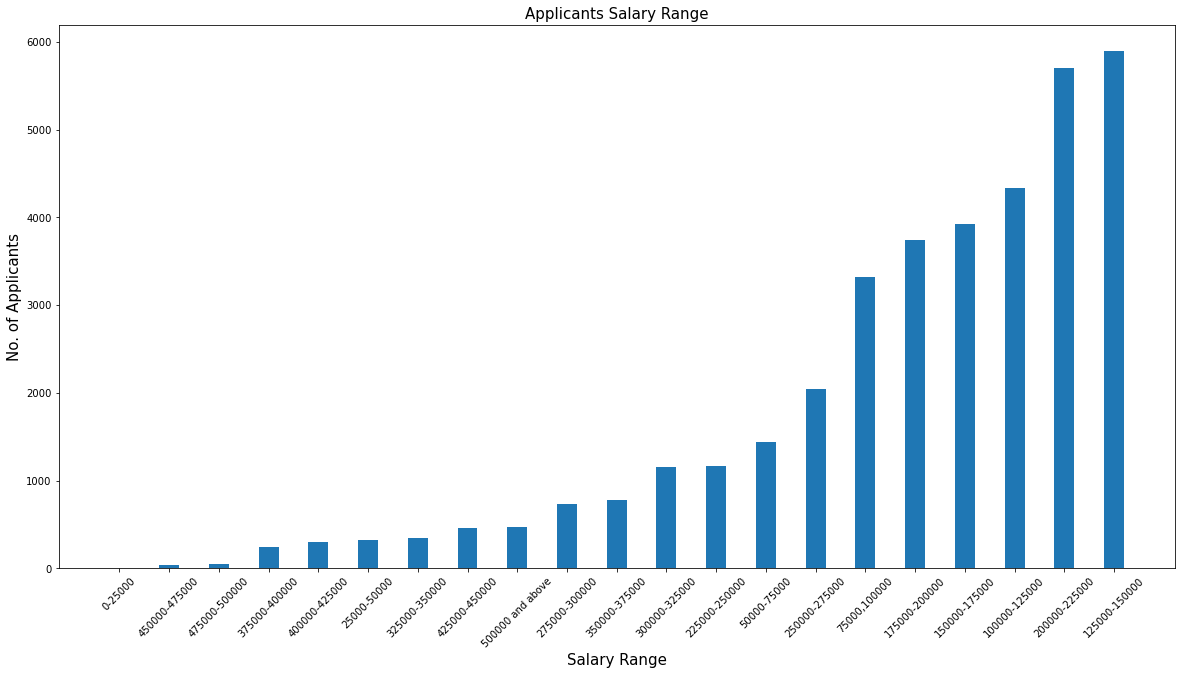

In [48]:

x = CSR2_df['Salary_Range']
y = CSR2_df['Applicants']

plt.rcParams["figure.figsize"] = (20,10)
plt.title('Applicants Salary Range', fontsize = 15)
plt.xlabel("Salary Range", fontsize = 15)
plt.ylabel("No. of Applicants", fontsize = 15)
plt.xticks(rotation=45)
plt.bar(x,y, width= 0.4)
plt.savefig('ApplicantSalaryRange.png', bbox_inches='tight') 



### Join the new_credit_df to the application_record_df to use for Machine Learning Models

In [49]:
credit_application_df = application_record_df.join(new_credit.set_index('ID'), on='ID', how='inner')
credit_application_df.drop(['MONTHS_BALANCE'], axis=1, inplace=True)
credit_application_df.drop(['Months_from_Today'], axis=1, inplace=True)
credit_application_df.drop(['ID'], axis=1, inplace=True)
credit_application_df.drop(['AMT_INCOME_RANGE'], axis=1, inplace=True)
credit_application_df

,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,...,OCCUPATION_TYPE_No Occupation Type,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,AGE,EMPLOYMENT_PERIOD,STATUS_y
0,0,4.275,2.0,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,32.89,12.44,1
1,0,4.275,2.0,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,32.89,12.44,1
2,0,1.125,2.0,0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,58.83,3.11,0
3,0,2.700,1.0,1,0,1,0,0,1,1,...,0,0,0,1,0,0,0,52.36,8.36,1
4,0,2.700,1.0,1,0,1,0,0,1,1,...,0,0,0,1,0,0,0,52.36,8.36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434808,0,3.150,2.0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,47.53,6.63,0
434809,0,1.575,2.0,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,33.94,3.63,0
434810,0,1.575,2.0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,33.94,3.63,0
434811,0,2.835,2.0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,49.20,1.79,0


### Rename the columns of the merged credit application file

In [50]:
# Rename the columns
capp = credit_application_df
capp.rename(columns = {'AMT_INCOME_TOTAL': 'INCOME','CODE_GENDER_M':'GENDER','FLAG_OWN_CAR_Y':'OWN_CAR','FLAG_OWN_REALTY_Y':'OWN_REALTY',
                       'NAME_INCOME_TYPE_Commercial associate':'CommAssociate', 'NAME_INCOME_TYPE_Pensioner':'Pensioner', 'NAME_INCOME_TYPE_State servant':'StateServant','NAME_INCOME_TYPE_Student':'Student', 'NAME_INCOME_TYPE_Working':'Working',
                       'NAME_EDUCATION_TYPE_Academic degree':'Academic Degree','NAME_EDUCATION_TYPE_Higher education':'HigherEducation', 'NAME_EDUCATION_TYPE_Incomplete higher':'IncompleteHigher', 'NAME_EDUCATION_TYPE_Lower secondary':'LowerSecondary', 'NAME_EDUCATION_TYPE_Secondary / secondary special':'SecondarySpecial',
                       'NAME_FAMILY_STATUS_Civil marriage':'Civil Marriage','NAME_FAMILY_STATUS_Married':'Married','NAME_FAMILY_STATUS_Separated':'Separated','NAME_FAMILY_STATUS_Single / not married':'Single/Not Married','NAME_FAMILY_STATUS_Widow':'Widow',
                       'NAME_HOUSING_TYPE_Co-op apartment':'Co-op Apt', 'NAME_HOUSING_TYPE_House / apartment':'Accom_House/Apt','NAME_HOUSING_TYPE_Municipal apartment':'Accom_Municipal Apt', 'NAME_HOUSING_TYPE_Office apartment':'Accom_Office Apt', 'NAME_HOUSING_TYPE_Rented apartment':'Accom_Rented Apt', 'NAME_HOUSING_TYPE_With parents':'Accom_With Parents',
                       'OCCUPATION_TYPE_Accountants': 'Accountants',
                                      'OCCUPATION_TYPE_Cleaning staff': 'Cleaners',
                                      'OCCUPATION_TYPE_Cooking staff': 'Cooks',
                                      'OCCUPATION_TYPE_Core staff': 'Core',
                                      'OCCUPATION_TYPE_Drivers': 'Drivers',
                                      'OCCUPATION_TYPE_HR staff': 'HR',
                                      'OCCUPATION_TYPE_High skill tech staff': 'Tech',
                                      'OCCUPATION_TYPE_IT staff': 'IT',
                                      'OCCUPATION_TYPE_Laborers': 'Laborers',
                                      'OCCUPATION_TYPE_Low-skill Laborers': 'LSLaborers',
                                      'OCCUPATION_TYPE_Managers': 'Managers',
                                      'OCCUPATION_TYPE_Medicine staff': 'Medical',
                                      'OCCUPATION_TYPE_No Occupation Type': 'None',
                                      'OCCUPATION_TYPE_Private service staff': 'Pvt_Service',
                                      'OCCUPATION_TYPE_Realty agents': 'Realtors',
                                      'OCCUPATION_TYPE_Sales staff': 'Sales',
                                      'OCCUPATION_TYPE_Secretaries': 'Secretaries',
                                      'OCCUPATION_TYPE_Security staff': 'Security',
                                      'OCCUPATION_TYPE_Waiters/barmen staff': 'Waiters_Barmen'}, inplace = True)


In [51]:
# Drop unnecessary columns
Columns_to_remove = ['CODE_GENDER_F', 'FLAG_OWN_CAR_N', 'FLAG_OWN_REALTY_N']

capp.drop(labels=Columns_to_remove,axis=1,inplace=True)


### Correlation Heatmap of the Credit Application file which has been renamed to capp

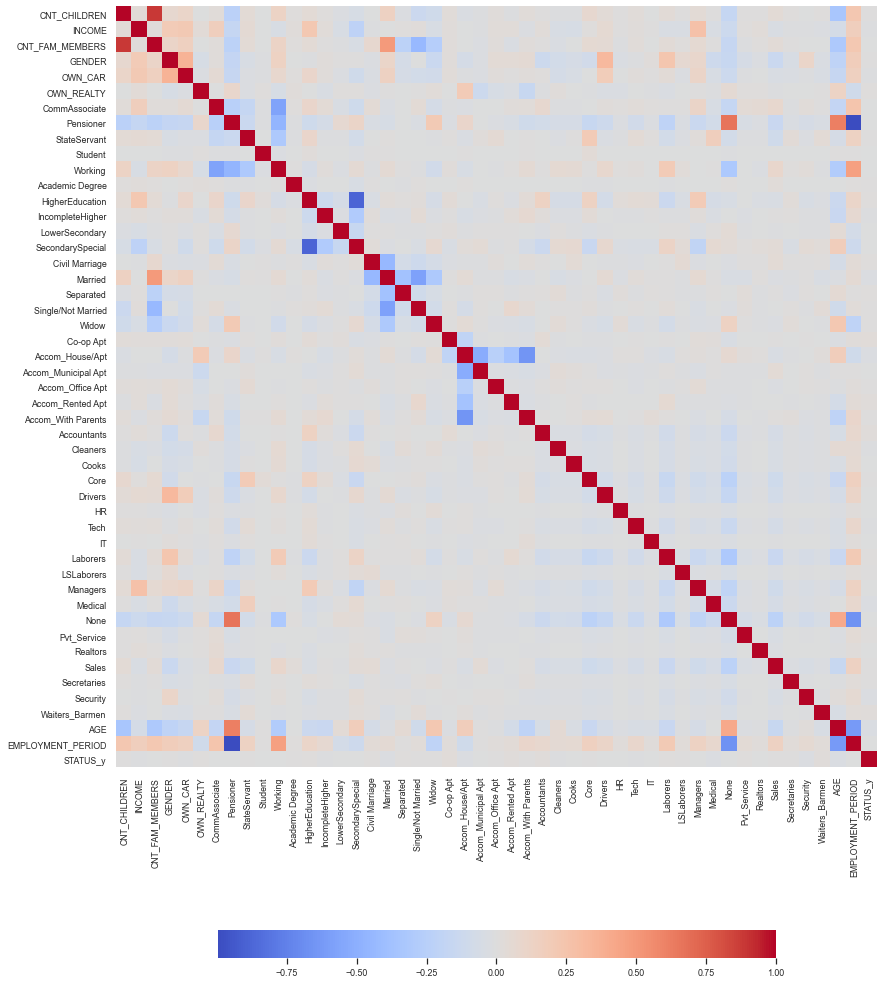

In [52]:
data=capp.corr()
sns.set(font_scale=0.8)
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data, square=True, annot=False, cmap='coolwarm', cbar_kws= {'orientation': 'horizontal', "shrink":.5})
plt.show()

## Plots of Dataset demographics

In [53]:
# Copy credit_application_df to a new DataFrame for univariate analysis
application_results = pd.DataFrame(capp).copy()

### Distribution of "Male" vs "Female" applicants

In [54]:
application_results["GENDER"].replace({1:"Male", 0:"Female"} , inplace= True )
application_results['GENDER'].value_counts()

Female    24430
Male      12027
Name: GENDER, dtype: int64

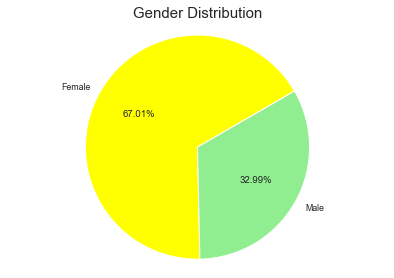

In [55]:
plt.figure(figsize=(15,10))
    
plt.subplot(2, 2, 1)
gender_df = pd.DataFrame(application_results['GENDER'].value_counts())
colors = ["yellow","lightgreen"]
plt.title('Gender Distribution', fontsize = 15)
plt.pie(gender_df['GENDER'].values, labels = gender_df.index.values, autopct='%1.2f%%', colors=colors, shadow=False, startangle=30)
plt.axis('equal')    
plt.savefig('GenderDistribution.png', dpi=100, bbox_inches='tight')
plt.show()


## Distribution of Realty Ownership

In [56]:
application_results["OWN_REALTY"].replace({1:"OWNERS", 0:"NON_OWNERS"} , inplace= True )
application_results['OWN_REALTY'].value_counts()

OWNERS        24506
NON_OWNERS    11951
Name: OWN_REALTY, dtype: int64

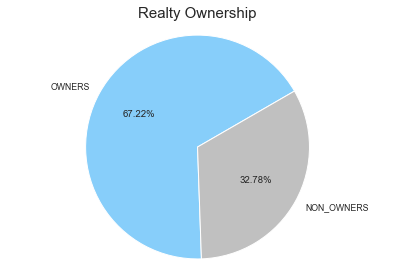

In [57]:
plt.figure(figsize=(15,10))
    
plt.subplot(2, 2, 1)
realty_ownership = pd.DataFrame(application_results['OWN_REALTY'].value_counts())
colors = ["lightskyblue","silver"]
plt.title('Realty Ownership', fontsize = 15)
plt.pie(realty_ownership['OWN_REALTY'].values, labels = realty_ownership.index.values, autopct='%1.2f%%', colors=colors, shadow=False, startangle=30)
plt.axis('equal')  
plt.savefig('RealtyOwnership.png', dpi=100, bbox_inches='tight')
plt.show()

### Distribution of Income Type

In [58]:
CA = application_results[application_results['CommAssociate']==1].count()['CommAssociate']
P = application_results[application_results['Pensioner']==1].count()['Pensioner']
SS = application_results[application_results['StateServant']==1].count()['StateServant']
STU = application_results[application_results['Student']==1].count()['Student']
W = application_results[application_results['Working']==1].count()['Working']
CA, P, SS, STU, W

(8490, 6152, 2985, 11, 18819)

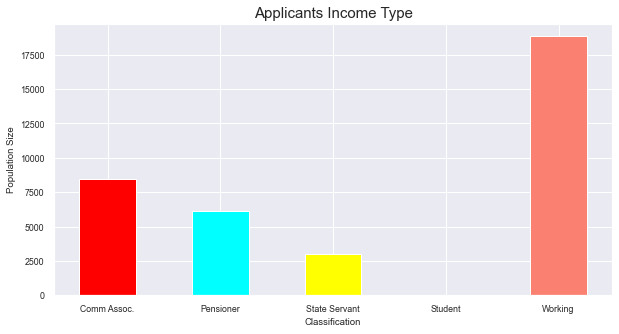

In [59]:
x = np.array(["Comm Assoc.", "Pensioner", "State Servant", "Student", "Working"])
y = np.array([CA,P,SS,STU,W])
plt.rcParams["figure.figsize"] = (10,5)
colors = ["Red","Aqua","Yellow", "Green", "Salmon"]
plt.title('Applicants Income Type', fontsize = 15)
plt.xlabel("Classification")
plt.ylabel("Population Size")

plt.bar(x,y, width=0.5, color = colors)
plt.savefig('ApplicantsIncomeType.png', dpi=100, bbox_inches='tight')
plt.show()

## Distribution of Occupation Type

In [60]:
#Assign short names to columns
ACC = application_results[application_results['Accountants']==1].count()['Accountants']
CL = application_results[application_results['Cleaners']==1].count()['Cleaners']
CK = application_results[application_results['Cooks']==1].count()['Cooks']
CE = application_results[application_results['Core']==1].count()['Core']
DRV = application_results[application_results['Drivers']==1].count()['Drivers']
HR = application_results[application_results['HR']==1].count()['HR']
TC = application_results[application_results['Tech']==1].count()['Tech']
IT = application_results[application_results['IT']==1].count()['IT']
LBR = application_results[application_results['Laborers']==1].count()['Laborers']
LSL = application_results[application_results['LSLaborers']==1].count()['LSLaborers']
MGR = application_results[application_results['Managers']==1].count()['Managers']
MED = application_results[application_results['Medical']==1].count()['Medical']
PS = application_results[application_results['Pvt_Service']==1].count()['Pvt_Service']
R = application_results[application_results['Realtors']==1].count()['Realtors']
S = application_results[application_results['Sales']==1].count()['Sales']
SEC = application_results[application_results['Secretaries']==1].count()['Secretaries']
SY = application_results[application_results['Security']==1].count()['Security']
WB = application_results[application_results['Waiters_Barmen']==1].count()['Waiters_Barmen']
N = application_results[application_results['None']==1].count()['None']


In [61]:
#Creating a DataFrame for Occupation Type
x = ['Accountants', 'Cleaners', 'Cooks', 'Core', 'Drivers','HR','Tech','IT','Laborers','LSLaborers', 'Managers', 'Medical', 'Pvt_Service', 'Realtors','Sales','Secretaries','Security','Waiters/Barmen','None']
y = [ACC, CL, CK, CE, DRV, HR, TC, IT, LBR, LSL, MGR, MED, PS, R, S, SEC, SY, WB, N]
occupation = pd.DataFrame(list(zip(x, y)))
occupation.sort_values(by=[1], inplace=True)

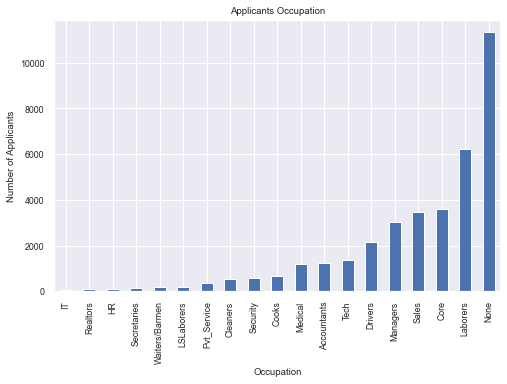

In [62]:
# Graph of Occupation type
occupation.plot.bar(x=0,y=1, title="Applicants Occupation", legend=None, figsize=(8,5))
plt.xlabel("Occupation")
plt.ylabel("Number of Applicants")
plt.savefig('ApplicantsOccupation.png', dpi=100, bbox_inches='tight')
plt.show(block=True)   


## Make up of "Good applicants"

In [63]:
good_applicants = application_results[application_results["STATUS_y"] == 1]
good_applicants

,CNT_CHILDREN,INCOME,CNT_FAM_MEMBERS,GENDER,OWN_CAR,OWN_REALTY,CommAssociate,Pensioner,StateServant,Student,...,None,Pvt_Service,Realtors,Sales,Secretaries,Security,Waiters_Barmen,AGE,EMPLOYMENT_PERIOD,STATUS_y
0,0,4.275,2.0,Male,1,OWNERS,0,0,0,0,...,1,0,0,0,0,0,0,32.89,12.44,1
1,0,4.275,2.0,Male,1,OWNERS,0,0,0,0,...,1,0,0,0,0,0,0,32.89,12.44,1
3,0,2.700,1.0,Female,0,OWNERS,1,0,0,0,...,0,0,0,1,0,0,0,52.36,8.36,1
4,0,2.700,1.0,Female,0,OWNERS,1,0,0,0,...,0,0,0,1,0,0,0,52.36,8.36,1
13,0,1.350,2.0,Male,1,OWNERS,1,0,0,0,...,0,0,0,0,0,0,0,48.71,3.27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49532,1,1.125,3.0,Female,1,OWNERS,0,0,0,0,...,0,0,0,0,0,0,0,39.00,0.85,1
49536,1,1.125,3.0,Female,1,OWNERS,0,0,0,0,...,0,0,0,0,0,0,0,39.00,0.85,1
49539,0,0.900,2.0,Female,0,NON_OWNERS,0,0,0,0,...,1,0,0,0,0,0,0,34.01,0.35,1
434498,2,1.125,4.0,Female,0,OWNERS,1,0,0,0,...,0,0,0,1,0,0,0,33.25,2.53,1


In [64]:
good_applicants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8344 entries, 0 to 434652
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CNT_CHILDREN         8344 non-null   int64  
 1   INCOME               8344 non-null   float64
 2   CNT_FAM_MEMBERS      8344 non-null   float64
 3   GENDER               8344 non-null   object 
 4   OWN_CAR              8344 non-null   uint8  
 5   OWN_REALTY           8344 non-null   object 
 6   CommAssociate        8344 non-null   uint8  
 7   Pensioner            8344 non-null   uint8  
 8   StateServant         8344 non-null   uint8  
 9   Student              8344 non-null   uint8  
 10  Working              8344 non-null   uint8  
 11  Academic Degree      8344 non-null   uint8  
 12  HigherEducation      8344 non-null   uint8  
 13  IncompleteHigher     8344 non-null   uint8  
 14  LowerSecondary       8344 non-null   uint8  
 15  SecondarySpecial     8344 non-null  

### "Good" Applicants Gender Distribution

In [65]:
good_applicants["GENDER"].replace({1:"Male", 0:"Female"} , inplace= True )
good_applicants['GENDER'].value_counts()

Female    5575
Male      2769
Name: GENDER, dtype: int64

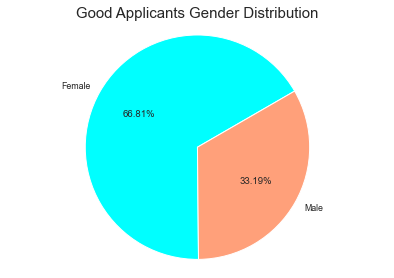

In [66]:
plt.figure(figsize=(15,10))
    
plt.subplot(2, 2, 1)
ggender_df = pd.DataFrame(good_applicants['GENDER'].value_counts())
colors = ["aqua","lightsalmon"]
plt.title('Good Applicants Gender Distribution', fontsize = 15)
plt.pie(ggender_df['GENDER'].values, labels = ggender_df.index.values, autopct='%1.2f%%', colors=colors, shadow=False, startangle=30)
plt.axis('equal')    
plt.savefig('GoodApplicantsGenderDistribution.png', dpi=100, bbox_inches='tight')
plt.show()

### "Good" Applicants Realty Ownership

In [67]:
good_applicants["OWN_REALTY"].replace({1:"OWNERS", 0:"NON_OWNERS"} , inplace= True )
good_applicants['OWN_REALTY'].value_counts()

OWNERS        5679
NON_OWNERS    2665
Name: OWN_REALTY, dtype: int64

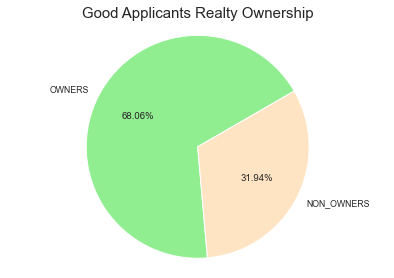

In [68]:
plt.figure(figsize=(15,10))
    
plt.subplot(2, 2, 1)
realty_ownership = pd.DataFrame(good_applicants['OWN_REALTY'].value_counts())
colors = ["lightgreen","bisque"]
plt.title('Good Applicants Realty Ownership', fontsize = 15)
plt.pie(realty_ownership['OWN_REALTY'].values, labels = realty_ownership.index.values, autopct='%1.2f%%', colors=colors, shadow=False, startangle=30)
plt.axis('equal')    
plt.savefig('GoodApplicantsRealtyOwnership.png', dpi=100, bbox_inches='tight')
plt.show()

### "Good Applicants" Distribution of Income Type

In [69]:
CA = good_applicants[good_applicants['CommAssociate']==1].count()['CommAssociate']
P = good_applicants[good_applicants['Pensioner']==1].count()['Pensioner']
SS = good_applicants[good_applicants['StateServant']==1].count()['StateServant']
STU = good_applicants[good_applicants['Student']==1].count()['Student']
W = good_applicants[good_applicants['Working']==1].count()['Working']
CA, P, SS, STU, W

(1941, 1410, 698, 1, 4294)

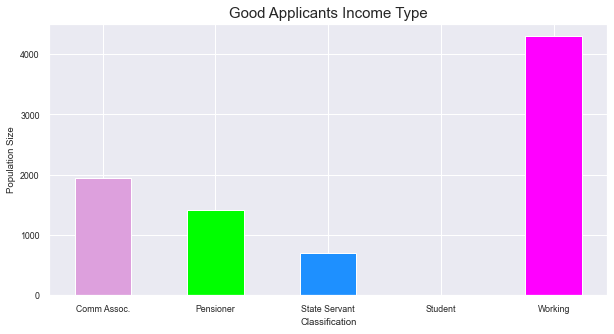

In [70]:
x = np.array(["Comm Assoc.", "Pensioner", "State Servant", "Student", "Working"])
y = np.array([CA,P,SS,STU,W])
plt.rcParams["figure.figsize"] = (10,5)
colors = ["plum","lime","dodgerblue", "red", "magenta"]
plt.title('Good Applicants Income Type', fontsize = 15)
plt.xlabel("Classification")
plt.ylabel("Population Size")

plt.bar(x,y, width=0.5, color = colors)
plt.savefig('GoodApplicantsIncomeType.png', dpi=100, bbox_inches='tight')
plt.show()

### "Good Applicants" Distribution of Occupation Type

In [71]:
#Assign short names to columns
ACC = good_applicants[good_applicants['Accountants']==1].count()['Accountants']
CL = good_applicants[good_applicants['Cleaners']==1].count()['Cleaners']
CK = good_applicants[good_applicants['Cooks']==1].count()['Cooks']
CE = good_applicants[good_applicants['Core']==1].count()['Core']
DRV = good_applicants[good_applicants['Drivers']==1].count()['Drivers']
HR = good_applicants[good_applicants['HR']==1].count()['HR']
TC = good_applicants[good_applicants['Tech']==1].count()['Tech']
IT = good_applicants[good_applicants['IT']==1].count()['IT']
LBR = good_applicants[good_applicants['Laborers']==1].count()['Laborers']
LSL = good_applicants[good_applicants['LSLaborers']==1].count()['LSLaborers']
MGR = good_applicants[good_applicants['Managers']==1].count()['Managers']
MED = good_applicants[good_applicants['Medical']==1].count()['Medical']
PS = good_applicants[good_applicants['Pvt_Service']==1].count()['Pvt_Service']
R = good_applicants[good_applicants['Realtors']==1].count()['Realtors']
S = good_applicants[good_applicants['Sales']==1].count()['Sales']
SEC = good_applicants[good_applicants['Secretaries']==1].count()['Secretaries']
SY = good_applicants[good_applicants['Security']==1].count()['Security']
WB = good_applicants[good_applicants['Waiters_Barmen']==1].count()['Waiters_Barmen']
N = good_applicants[good_applicants['None']==1].count()['None']


In [72]:
#Creating a DataFrame for Occupation Type
x = ['Accountants', 'Cleaners', 'Cooks', 'Core', 'Drivers','HR','Tech','IT','Laborers','LSLaborers', 'Managers', 'Medical', 'Pvt_Service', 'Realtors','Sales','Secretaries','Security','Waiters/Barmen','None']
y = [ACC, CL, CK, CE, DRV, HR, TC, IT, LBR, LSL, MGR, MED, PS, R, S, SEC, SY, WB, N]
goccupation = pd.DataFrame(list(zip(x, y)))
goccupation.sort_values(by=[1], inplace=True)

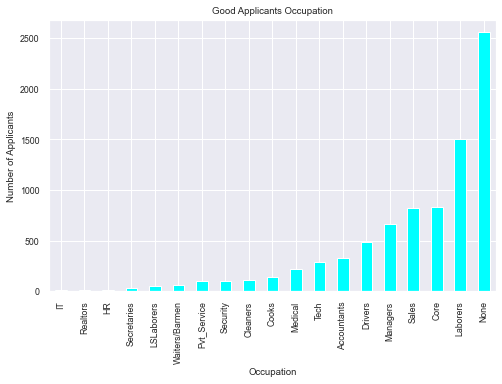

In [73]:
# Graph of Occupation type
colors = ["Cyan"]
goccupation.plot.bar(x=0,y=1, title="Good Applicants Occupation", legend=None, figsize=(8,5), color = colors)
plt.xlabel("Occupation")
plt.ylabel("Number of Applicants")
plt.savefig('GoodApplicantsOccupation.png', dpi=100, bbox_inches='tight')
plt.show(block=True)   

In [74]:
GA_CommAssociate = good_applicants.CommAssociate.value_counts()
GA_CommAssociate

0    6403
1    1941
Name: CommAssociate, dtype: int64

In [75]:
GA_Pensioner = good_applicants.Pensioner.value_counts()
GA_Pensioner

0    6934
1    1410
Name: Pensioner, dtype: int64

In [76]:
GA_Student = good_applicants.Student.value_counts()
GA_Student

0    8343
1       1
Name: Student, dtype: int64

In [77]:
GA_StateServant = good_applicants.StateServant.value_counts()
GA_StateServant

0    7646
1     698
Name: StateServant, dtype: int64

In [78]:
GA_Working = good_applicants.Working.value_counts()
GA_Working

1    4294
0    4050
Name: Working, dtype: int64

x = np.array(["Comm Assoc.", "Pensioner", "State Servant", "Student", "Working"])
y = np.array([GA_CommAssociate, GA_Pensioner, GA_StateServant, GA_Student, GA_Working])

plt.rcParams["figure.figsize"] = (10,5)
colors = ["Red","Aqua","Yellow", "Green", "Salmon"]
plt.title('Applicants Income Type', fontsize = 15)
plt.xlabel("Classification")
plt.ylabel("Population Size")

plt.bar(x,y, width=0.5, color = colors)
plt.show()

## Machine Learning Models

### Split the Data into Training and Testing

In [79]:
# Create the features
X = credit_application_df.drop(columns= "STATUS_y")
                               
# Create the target
y = pd.DataFrame(credit_application_df["STATUS_y"])    

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Counter(y_train)

Counter({'STATUS_y': 1})

In [81]:
# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(27342, 48)
(9115, 48)
(27342, 1)
(9115, 1)


## Scale the data

In [82]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Class Imbalance

#### The existing classes in the dataset are not equally represented. This is referred to as Class Imbalance and can cause the machine learning models to be biased toward the majority class. In this case, the machine learning models will be better at predicting applicants who have been denied a CCard. Hence, to counter this problem, Oversampling, Undersampling and Combination sampling techniques will be used.¶

## Random Oversampling

In [83]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)

Counter(y_resampled)

Counter({'STATUS_y': 1})

### Logistic Regression

In [84]:
# Train the Logistic Regression model using the resampled data
log_model = LogisticRegression(solver='lbfgs', random_state=1)
log_model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [85]:
# Calculate the balanced accuracy score
predictions = log_model.predict(X_test_scaled)
acc_score = accuracy_score(y_test, predictions)

In [86]:
# Display the confusion matrix
# Calculate the confusion matrix
cmlr = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cmlr_df = pd.DataFrame(
    cmlr, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

In [87]:
# Display the results
print("Confusion Matrix")
display(cmlr_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,3726,3353
Actual 1,1024,1012


Accuracy Score : 0.51980252331322
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.53      0.63      7079
           1       0.23      0.50      0.32      2036

    accuracy                           0.52      9115
   macro avg       0.51      0.51      0.47      9115
weighted avg       0.66      0.52      0.56      9115



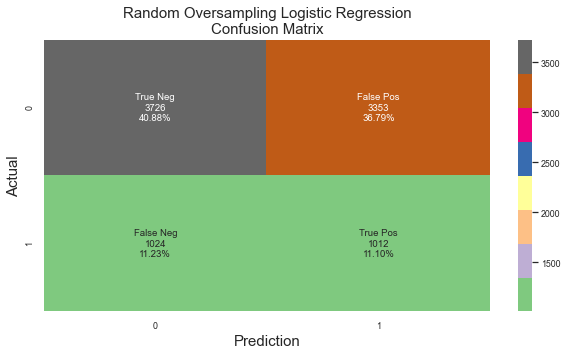

In [88]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cmlr.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cmlr.flatten()/np.sum(cmlr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmlr, annot=labels, fmt='', cmap='Accent')

plt.title(f"{'Random Oversampling Logistic Regression'}\n{'Confusion Matrix'}", fontsize = 15)
plt.xlabel('Prediction', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.savefig('RdmOverSLogRegCM.png', dpi=100, bbox_inches='tight')
plt.show()

### Decision Tree

In [89]:
# Create the decision tree classifier instance.
tree_model = tree.DecisionTreeClassifier()
# Fit the model.
tree_model.fit(X_resampled, y_resampled)

DecisionTreeClassifier()

In [90]:
predictions = tree_model.predict(X_test_scaled)
acc_score = accuracy_score(y_test, predictions)

In [91]:
# Display the confusion matrix
# Calculate the confusion matrix
cmdt = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cmdt_df = pd.DataFrame(
    cmdt, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

In [92]:
# Display the results
print("Confusion Matrix")
display(cmdt_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,5390,1689
Actual 1,773,1263


Accuracy Score : 0.7298957761930883
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      7079
           1       0.43      0.62      0.51      2036

    accuracy                           0.73      9115
   macro avg       0.65      0.69      0.66      9115
weighted avg       0.77      0.73      0.75      9115



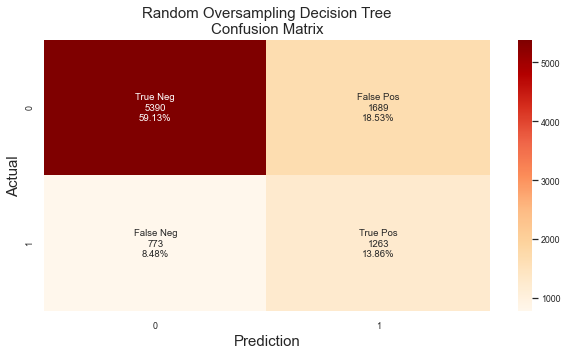

In [93]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cmdt.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cmdt.flatten()/np.sum(cmdt)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmdt, annot=labels, fmt='', cmap='OrRd')

plt.title(f"{'Random Oversampling Decision Tree'}\n{'Confusion Matrix'}", fontsize = 15)
plt.xlabel('Prediction', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.savefig('RdmOverSDecTCM.png', dpi=100, bbox_inches='tight')
plt.show()

### Random Forest

In [94]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128)

In [95]:
# Fit the model
rf_model = rf_model.fit(X_resampled, y_resampled)

In [96]:
# Make predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

In [97]:
# Calculate the confusion matrix.
cmrf = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cmrf_df = pd.DataFrame(
    cmrf, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cmrf_df

,Predicted 0,Predicted 1
Actual 0,5462,1617
Actual 1,791,1245


In [98]:
# Calculate the accuracy score.
acc_score = accuracy_score(y_test, predictions)

In [99]:
# Display the results
print("Confusion Matrix")
display(cmrf_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,5462,1617
Actual 1,791,1245


Accuracy Score : 0.7358200767964893
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      7079
           1       0.44      0.61      0.51      2036

    accuracy                           0.74      9115
   macro avg       0.65      0.69      0.66      9115
weighted avg       0.78      0.74      0.75      9115



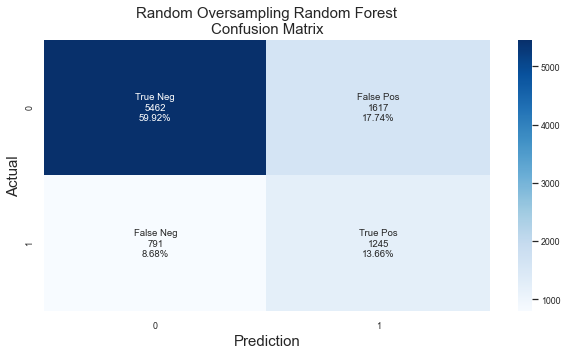

In [100]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cmrf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cmrf.flatten()/np.sum(cmrf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmrf, annot=labels, fmt='', cmap='Blues')

plt.title(f"{'Random Oversampling Random Forest'}\n{'Confusion Matrix'}", fontsize = 15)
plt.xlabel('Prediction', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.savefig('RdmOverSRdmForCM.png', dpi=100, bbox_inches='tight')
plt.show()

In [101]:
# Sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.25940626538700834, 'AGE'),
 (0.17481244104732654, 'INCOME'),
 (0.16873223724224676, 'EMPLOYMENT_PERIOD'),
 (0.034209634149928385, 'CNT_FAM_MEMBERS'),
 (0.029391853880947894, 'OWN_REALTY'),
 (0.026625024337274573, 'CNT_CHILDREN'),
 (0.023398061884412867, 'GENDER'),
 (0.021114040471402317, 'OWN_CAR'),
 (0.017078328182192237, 'Working'),
 (0.015130219940849383, 'CommAssociate'),
 (0.014780661066302157, 'SecondarySpecial'),
 (0.01449344147874318, 'None'),
 (0.013957428223036396, 'Married'),
 (0.013641336556064216, 'HigherEducation'),
 (0.012674350431292362, 'Laborers'),
 (0.012113055041474806, 'Core'),
 (0.010720415906732266, 'Sales'),
 (0.010671779522741981, 'Single/Not Married'),
 (0.010452149756772004, 'Civil Marriage'),
 (0.010027595226780386, 'Managers'),
 (0.008955473700099465, 'StateServant'),
 (0.008737927335294556, 'Accom_House/Apt'),
 (0.007712766464104509, 'Separated'),
 (0.006987654122038851, 'Drivers'),
 (0.006471899858495133, 'Tech'),
 (0.00620314539244149, 'IncompleteHig

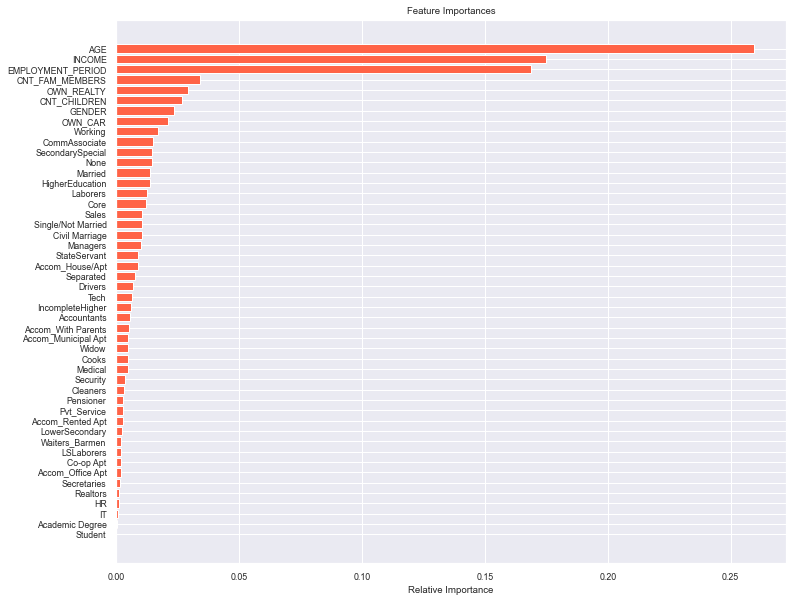

<Figure size 21600x7200 with 0 Axes>

In [102]:
# Plotting features by importance
features = credit_application_df.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='tomato', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
plt.figure(figsize=(300,100)) 
plt.savefig('ROSRFFeatures.jpg', bbox_inches='tight') ##not saing figure blank



### Gradient Boosted Tree

In [103]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
   classifier = GradientBoostingClassifier(n_estimators=20,
   learning_rate=learning_rate,
   max_features=5,
   max_depth=3,
   random_state=0)
   classifier.fit(X_resampled, y_resampled)
   print("Learning rate: ", learning_rate)
   print("Accuracy score (training): {0:.3f}".format(
       classifier.score(
           X_train_scaled,
           y_train)))
   print("Accuracy score (validation): {0:.3f}".format(
       classifier.score(
           X_test_scaled,
           y_test)))

Learning rate:  0.05
Accuracy score (training): 0.545
Accuracy score (validation): 0.533
Learning rate:  0.1
Accuracy score (training): 0.530
Accuracy score (validation): 0.518
Learning rate:  0.25
Accuracy score (training): 0.561
Accuracy score (validation): 0.545
Learning rate:  0.5
Accuracy score (training): 0.561
Accuracy score (validation): 0.542
Learning rate:  0.75
Accuracy score (training): 0.566
Accuracy score (validation): 0.547
Learning rate:  1
Accuracy score (training): 0.564
Accuracy score (validation): 0.547


In [104]:
GB_classifier = GradientBoostingClassifier(n_estimators=20,
   learning_rate=1, max_features=5, max_depth=3, random_state=0)

GB_classifier.fit(X_resampled, y_resampled)
predictions = GB_classifier.predict(X_test_scaled)

In [105]:
cmgb = confusion_matrix(y_test, predictions)
cmgb_df = pd.DataFrame(
   cmgb, index=["Actual 0", "Actual 1"],
   columns=["Predicted 0", "Predicted 1"]
)
acc_score = accuracy_score(y_test, predictions)

In [106]:
# Display results
print("Confusion Matrix")
display(cmgb_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,3911,3168
Actual 1,959,1077


Accuracy Score : 0.5472298409215579
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.55      0.65      7079
           1       0.25      0.53      0.34      2036

    accuracy                           0.55      9115
   macro avg       0.53      0.54      0.50      9115
weighted avg       0.68      0.55      0.58      9115



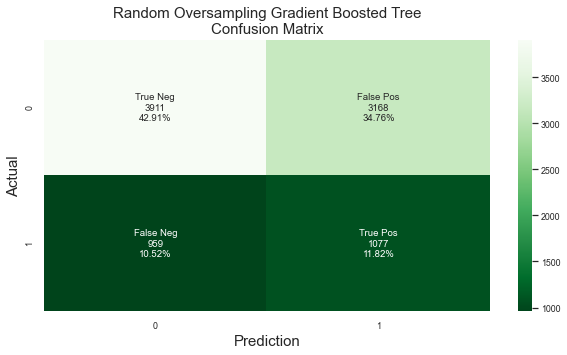

In [107]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cmgb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cmgb.flatten()/np.sum(cmgb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmgb, annot=labels, fmt='', cmap='Greens_r')

plt.title(f"{'Random Oversampling Gradient Boosted Tree'}\n{'Confusion Matrix'}", fontsize = 15)
plt.xlabel('Prediction', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.savefig('ROSGBTCM.png', dpi=100, bbox_inches='tight')
plt.show()

## SMOTE OVERSAMPLING

In [108]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy='auto').fit_resample(X_train_scaled, y_train)
Counter(y_resampled)

Counter({'STATUS_y': 1})

### Logistic Regression

In [109]:
# Train the Logistic Regression model using the resampled data
log_model = LogisticRegression(solver='lbfgs', random_state=1)
log_model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [110]:
# Calculate the balanced accuracy score
predictions = log_model.predict(X_test_scaled)
acc_score = accuracy_score(y_test, predictions)

In [111]:
# Display the confusion matrix
# Calculate the confusion matrix
cmso = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cmso_df = pd.DataFrame(
    cmso, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

In [112]:
# Display results
print("Confusion Matrix")
display(cmso_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,3666,3413
Actual 1,1008,1028


Accuracy Score : 0.5149753154141525
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.52      0.62      7079
           1       0.23      0.50      0.32      2036

    accuracy                           0.51      9115
   macro avg       0.51      0.51      0.47      9115
weighted avg       0.66      0.51      0.56      9115



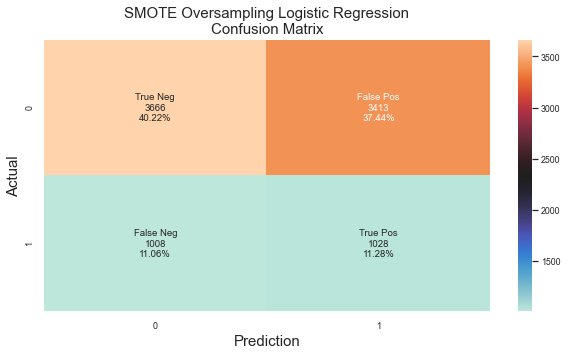

In [113]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cmso.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cmso.flatten()/np.sum(cmso)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmso, annot=labels, fmt='', cmap='icefire')

plt.title(f"{'SMOTE Oversampling Logistic Regression'}\n{'Confusion Matrix'}", fontsize = 15)
plt.xlabel('Prediction', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.savefig('SOSLRCM.png', dpi=100, bbox_inches='tight')
plt.show()

### Decision Tree

In [114]:
# Create the decision tree classifier instance.
tree_model = tree.DecisionTreeClassifier()
# Fit the model.
tree_model.fit(X_resampled, y_resampled)

DecisionTreeClassifier()

In [115]:
predictions = tree_model.predict(X_test_scaled)
acc_score = accuracy_score(y_test, predictions)

In [116]:
# Display the confusion matrix
# Calculate the confusion matrix
cmsodt = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cmsodt_df = pd.DataFrame(
    cmsodt, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
# Display the results
print("Confusion Matrix")
display(cmsodt_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,5934,1145
Actual 1,1003,1033


Accuracy Score : 0.7643444871091607
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      7079
           1       0.47      0.51      0.49      2036

    accuracy                           0.76      9115
   macro avg       0.66      0.67      0.67      9115
weighted avg       0.77      0.76      0.77      9115



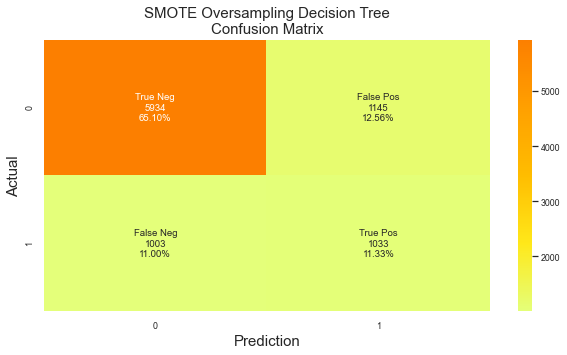

In [117]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cmsodt.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cmsodt.flatten()/np.sum(cmsodt)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmsodt, annot=labels, fmt='', cmap='Wistia')

plt.title(f"{'SMOTE Oversampling Decision Tree'}\n{'Confusion Matrix'}", fontsize = 15)
plt.xlabel('Prediction', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.savefig('SOSDTCM.png', dpi=100, bbox_inches='tight')
plt.show()

### Random Forest

In [118]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128)

In [119]:
# Fit the model
rf_model = rf_model.fit(X_resampled, y_resampled)
# Make predictions using the test data.
predictions = rf_model.predict(X_test_scaled)

In [120]:
# Calculate the confusion matrix.
cmsorf = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cmsorf_df = pd.DataFrame(
    cmsorf, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

# Calculate the accuracy score.
acc_score = accuracy_score(y_test, predictions)

In [121]:
# Display the results
print("Confusion Matrix")
display(cmsorf_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,5977,1102
Actual 1,985,1051


Accuracy Score : 0.7710367526055951
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      7079
           1       0.49      0.52      0.50      2036

    accuracy                           0.77      9115
   macro avg       0.67      0.68      0.68      9115
weighted avg       0.78      0.77      0.77      9115



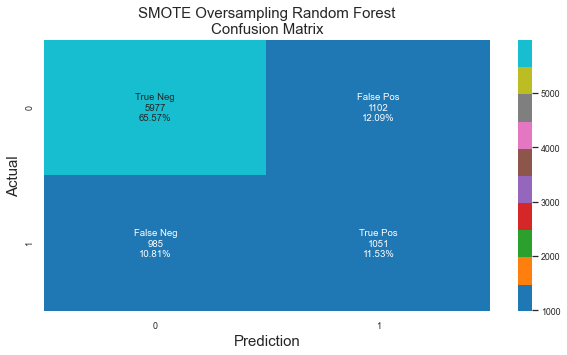

In [122]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cmsorf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cmsorf.flatten()/np.sum(cmsorf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmsorf, annot=labels, fmt='', cmap='tab10')

plt.title(f"{'SMOTE Oversampling Random Forest'}\n{'Confusion Matrix'}", fontsize = 15)
plt.xlabel('Prediction', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.savefig('SOSRFCM.png', dpi=100, bbox_inches='tight')
plt.show()

In [123]:
# Sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.2372664213229176, 'AGE'),
 (0.1883735280884634, 'INCOME'),
 (0.15122319583869842, 'EMPLOYMENT_PERIOD'),
 (0.037542864493280086, 'CNT_FAM_MEMBERS'),
 (0.03502795494099431, 'CNT_CHILDREN'),
 (0.03387667239507512, 'OWN_CAR'),
 (0.03313815935821221, 'OWN_REALTY'),
 (0.026656431220370782, 'GENDER'),
 (0.01688642332820358, 'Working'),
 (0.01593534356655195, 'SecondarySpecial'),
 (0.015111506867804455, 'CommAssociate'),
 (0.014629857850418324, 'HigherEducation'),
 (0.014108248568308094, 'None'),
 (0.013373283198891351, 'Laborers'),
 (0.01316245698490084, 'Married'),
 (0.011606073347628419, 'Core'),
 (0.011271670148421006, 'Sales'),
 (0.009735304652015535, 'Managers'),
 (0.00926655146233175, 'Single/Not Married'),
 (0.009154816187721765, 'Civil Marriage'),
 (0.009086056448377093, 'Accom_House/Apt'),
 (0.008394407667884973, 'StateServant'),
 (0.0070680878915483, 'Drivers'),
 (0.00704976823344386, 'Tech'),
 (0.006628180578367289, 'Separated'),
 (0.005889061854216182, 'Accountants'),
 (0.0057

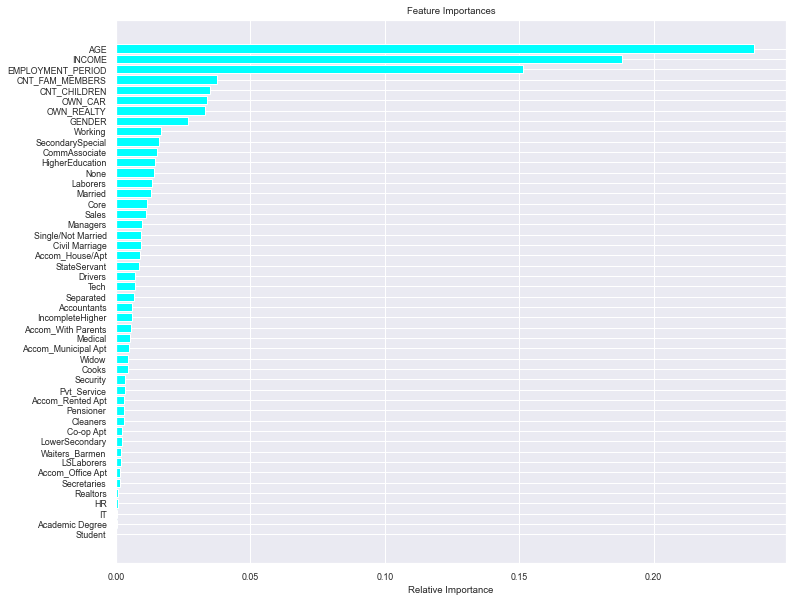

<Figure size 21600x7200 with 0 Axes>

In [124]:
# Plotting features by importance
features = credit_application_df.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='aqua', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
plt.figure(figsize=(300,100))
plt.savefig('SOSRFFeatures.jpg', bbox_inches='tight') ##not saing figure blank

### Gradient Boosted Tree

In [125]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
   classifier = GradientBoostingClassifier(n_estimators=20,
   learning_rate=learning_rate,
   max_features=5,
   max_depth=3,
   random_state=0)
   classifier.fit(X_resampled, y_resampled)
   print("Learning rate: ", learning_rate)
   print("Accuracy score (training): {0:.3f}".format(
       classifier.score(
           X_train_scaled,
           y_train)))
   print("Accuracy score (validation): {0:.3f}".format(
       classifier.score(
           X_test_scaled,
           y_test)))

Learning rate:  0.05
Accuracy score (training): 0.574
Accuracy score (validation): 0.562
Learning rate:  0.1
Accuracy score (training): 0.583
Accuracy score (validation): 0.566
Learning rate:  0.25
Accuracy score (training): 0.606
Accuracy score (validation): 0.589
Learning rate:  0.5
Accuracy score (training): 0.606
Accuracy score (validation): 0.592
Learning rate:  0.75
Accuracy score (training): 0.596
Accuracy score (validation): 0.584
Learning rate:  1
Accuracy score (training): 0.605
Accuracy score (validation): 0.586


In [126]:
GB_classifier = GradientBoostingClassifier(n_estimators=20,
   learning_rate=0.75, max_features=5, max_depth=3, random_state=0)

GB_classifier.fit(X_resampled, y_resampled)
predictions = GB_classifier.predict(X_test_scaled)

In [127]:
cmsogb = confusion_matrix(y_test, predictions)
cmsogb_df = pd.DataFrame(
   cmsogb, index=["Actual 0", "Actual 1"],
   columns=["Predicted 0", "Predicted 1"]
)
acc_score = accuracy_score(y_test, predictions)
# Displaying results
print("Confusion Matrix")
display(cmsogb_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,4450,2629
Actual 1,1166,870


Accuracy Score : 0.5836533187054306
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.63      0.70      7079
           1       0.25      0.43      0.31      2036

    accuracy                           0.58      9115
   macro avg       0.52      0.53      0.51      9115
weighted avg       0.67      0.58      0.61      9115



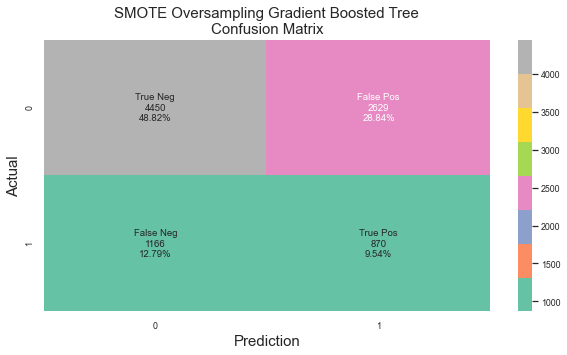

In [128]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cmsogb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cmsogb.flatten()/np.sum(cmsogb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmsogb, annot=labels, fmt='', cmap='Set2')

plt.title(f"{'SMOTE Oversampling Gradient Boosted Tree'}\n{'Confusion Matrix'}", fontsize = 15)
plt.xlabel('Prediction', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.savefig('SOSDGBTCM.png', dpi=100, bbox_inches='tight')
plt.show()

## Undersampling

### Random Undersampling

In [129]:
# Undersample the data using `RandomUnderSampler`
ros = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)
Counter(y_resampled)

Counter({'STATUS_y': 1})

In [130]:
# Fit a Logistic regression model using random undersampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [131]:
# Display the confusion matrix
y_pred = model.predict(X_test)
cmru=confusion_matrix(y_test, y_pred)

cmru_df = pd.DataFrame(
   cmru, index=["Actual 0", "Actual 1"],
   columns=["Predicted 0", "Predicted 1"]
)
bal_acc_score = balanced_accuracy_score(y_test, y_pred)

# Displaying results
print("Confusion Matrix")
display(cmru_df)
print(f"Accuracy Score : {bal_acc_score}")
print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,5918,1161
Actual 1,1703,333


Accuracy Score : 0.49977488828714167
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      7079
           1       0.22      0.16      0.19      2036

    accuracy                           0.69      9115
   macro avg       0.50      0.50      0.50      9115
weighted avg       0.65      0.69      0.67      9115



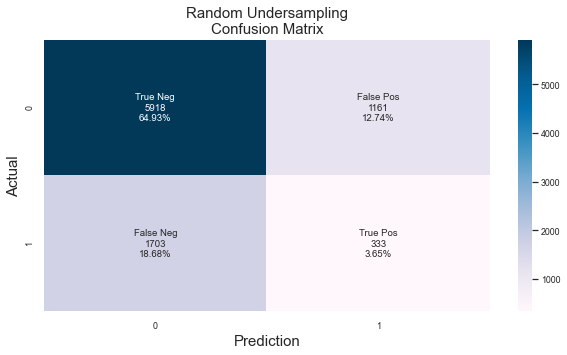

In [132]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cmru.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cmru.flatten()/np.sum(cmru)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmru, annot=labels, fmt='', cmap='PuBu')

plt.title(f"{'Random Undersampling'}\n{'Confusion Matrix'}", fontsize = 15)
plt.xlabel('Prediction', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.savefig('RUSLRCM.png', dpi=100, bbox_inches='tight')
plt.show()

### Undersampling using Cluster Centroids

In [133]:
# Resample the data using the ClusterCentroids resampler
cc = ClusterCentroids(random_state=1)
X_resampled, y_resampled = cc.fit_resample(X_train_scaled, y_train)
Counter(y_resampled)

Counter({'STATUS_y': 1})

In [134]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [135]:
# Display the confusion matrix
y_pred = model.predict(X_test)
cmucc=confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cmucc_df = pd.DataFrame(
    cmucc, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
cmucc_df

# Calculated the accuracy score
acc_score=balanced_accuracy_score(y_test, y_pred)

# Displaying results
print("Confusion Matrix")
display(cmru_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report_imbalanced(y_test, y_pred))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,5918,1161
Actual 1,1703,333


Accuracy Score : 0.49977488828714167
Classification Report
                   pre       rec       spe        f1       geo       iba       sup

          0       0.78      0.84      0.16      0.81      0.37      0.15      7079
          1       0.22      0.16      0.84      0.19      0.37      0.13      2036

avg / total       0.65      0.69      0.31      0.67      0.37      0.14      9115



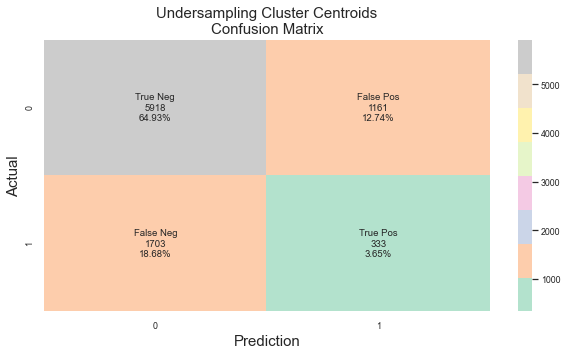

In [136]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cmucc.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cmucc.flatten()/np.sum(cmucc)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmucc, annot=labels, fmt='', cmap='Pastel2')

plt.title(f"{'Undersampling Cluster Centroids'}\n{'Confusion Matrix'}", fontsize = 15)
plt.xlabel('Prediction', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.savefig('RUSCCCM.png', dpi=100, bbox_inches='tight')
plt.show()

## Combination Sampling using SMOTEENN

In [137]:
# Resample the training data with SMOTEENN

smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)
Counter(y_resampled)

Counter({'STATUS_y': 1})

In [138]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=78)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=78)

In [139]:
# Train the Logistic Regression model using the resampled data
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=78)

In [140]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.515392000357459

In [141]:
# Display the confusion matrix

# Calculate the confusion matrix
cmcs = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cmcs_df = pd.DataFrame(
    cmcs, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
cmcs_df

,Predicted 0,Predicted 1
Actual 0,5854,1225
Actual 1,1621,415


In [142]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.78      0.83      0.20      0.80      0.41      0.18      7079
          1       0.25      0.20      0.83      0.23      0.41      0.16      2036

avg / total       0.66      0.69      0.34      0.68      0.41      0.17      9115



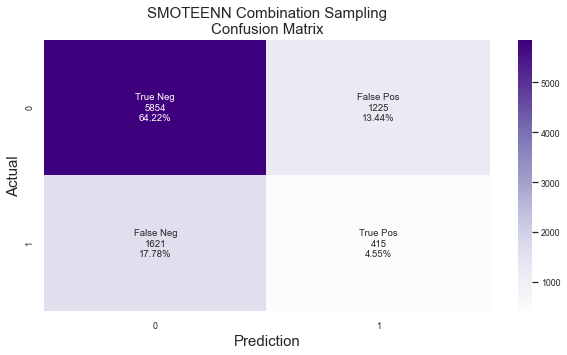

In [143]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cmcs.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cmcs.flatten()/np.sum(cmucc)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmcs, annot=labels, fmt='', cmap='Purples')

plt.title(f"{'SMOTEENN Combination Sampling'}\n{'Confusion Matrix'}", fontsize = 15)
plt.xlabel('Prediction', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.savefig('SCSCM.png', dpi=100, bbox_inches='tight')
plt.show()